In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms'].fillna(0, inplace=True) 

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Univariate analysis

<AxesSubplot:xlabel='median_income', ylabel='Count'>

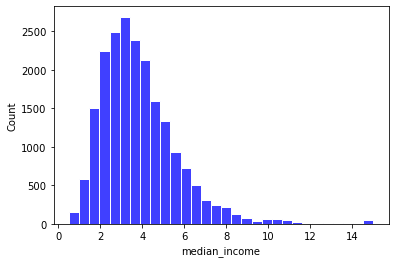

In [11]:
sns.histplot(df['median_income'],color='b',edgecolor='w',bins=30)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

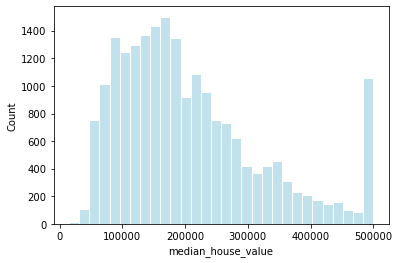

In [12]:
sns.histplot(df['median_house_value'], color='lightblue', edgecolor='w', bins=30)

### Bivirate analysis

C:\Users\petergg4me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


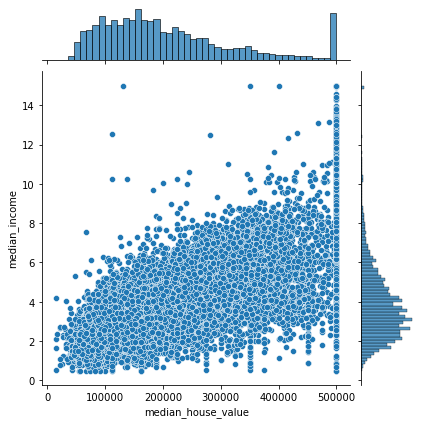

In [13]:
sns.jointplot(df['median_house_value'], df['median_income'], kind='scatter')

### Multiviriate Analysis

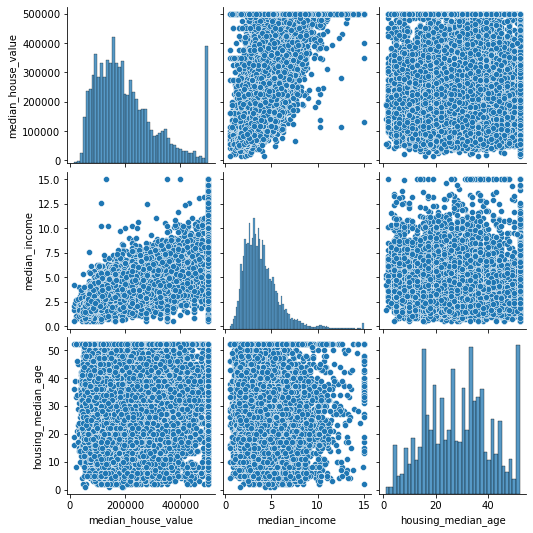

In [14]:
sns.pairplot(df[['median_house_value','median_income','housing_median_age']])

In [15]:
x=df['median_income'].values.reshape(-1,1)
y=df['median_house_value'].values.reshape(-1,1)

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size =0.2, random_state=0)

In [17]:
reg=LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
print(reg.intercept_)
print(reg.coef_)

[44320.63522766]
[[42032.17769894]]


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [25]:
pred=reg.predict(x_test)

In [26]:
pred

array([[218829.83059812],
       [287249.80945645],
       [227105.96638704],
       ...,
       [178937.09074405],
       [302549.52213887],
       [184397.07062714]])

In [29]:
score=r2_score(pred,y_test)
score

-0.16592148447769106

In [30]:
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred, y_test)
rmse=np.sqrt(mse)

In [31]:
print(mae)
print(mse)
print(rmse)
print(score)

63521.303480406685
7214982234.0146055
84941.05152406936
-0.16592148447769106


In [32]:
df2=pd.DataFrame({'Actual': y_test.flatten(), 'predicted MaxTemp': pred.flatten()})
df2


,Actual,predicted MaxTemp
0,136900.0,218829.830598
1,241300.0,287249.809456
2,200700.0,227105.966387
3,72500.0,147345.705986
4,460000.0,254687.481393
...,...,...
4123,169500.0,148631.890623
4124,204600.0,228585.499042
4125,128600.0,178937.090744
4126,259500.0,302549.522139
